In [37]:
import pandas as pd
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import ROOT
import uproot
import awkward as ak
hep.style.use(hep.style.CMS)

In [38]:
# open the file
file = uproot.open("../analyzer_output.root")

# Z candidate
data_events = file["demo/ntuple"]
# data_events.show()
data_df = data_events.arrays(library="pd")

# gen events
gen_events = file["demo/genTree"]
# gen_events.show()
gen_df = gen_events.arrays(library="pd")

# track events
track_events = file["demo/pfCandsTree"]
# track_events.show()
track_df = track_events.arrays(library="pd")

In [39]:
# calulate deltaR between two particles
def deltaR(p1_eta, p2_eta, p1_phi, p2_phi):
    deta = p1_eta - p2_eta
    dphi = p1_phi - p2_phi
    if dphi > np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return np.sqrt(deta*deta + dphi*dphi)

In [40]:
truth_df = gen_df.merge(track_df, on='Event', how='left')

In [41]:
truth_df

,Event,genZ_mass,genZ_px,genZ_py,genZ_pz,genZ_pt,genZ_eta,genZ_phi,genPhi_mass,genPhi_px,...,pfCands_px,pfCands_py,pfCands_pz,pfCands_pt,pfCands_eta,pfCands_phi,pfCands_charge,pfCands_vx,pfCands_vy,pfCands_vz
0,1.0,91.500244,34.088882,9.896194,1058.140625,35.496288,4.088269,0.282539,1.019328,-16.258198,...,0.575216,-0.724772,1.686568,0.925293,1.361431,-0.899939,1.0,-6.478999,-5.107276,-0.404700
1,1.0,91.500244,34.088882,9.896194,1058.140625,35.496288,4.088269,0.282539,1.019328,-16.258198,...,0.407684,-0.748743,2.593964,0.852539,1.831843,-1.072192,1.0,-11.389102,-6.163723,9.321106
2,1.0,91.500244,34.088882,9.896194,1058.140625,35.496288,4.088269,0.282539,1.019328,-16.258198,...,0.316669,-0.422899,0.972884,0.528320,1.370403,-0.928061,1.0,-6.036874,-4.485058,12.087356
3,1.0,91.500244,34.088882,9.896194,1058.140625,35.496288,4.088269,0.282539,1.019328,-16.258198,...,0.609719,0.207446,-2.980498,0.644043,-2.236701,0.327946,1.0,0.811011,-2.309251,11.031105
4,1.0,91.500244,34.088882,9.896194,1058.140625,35.496288,4.088269,0.282539,1.019328,-16.258198,...,-0.051395,0.744811,-3.370591,0.746582,-2.212531,1.639691,1.0,2.088149,0.183450,3.422160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,1000.0,89.987900,36.230099,-0.581528,-342.770355,36.234764,-2.942971,-0.016050,1.008773,-25.597073,...,-0.091673,-1.107541,-2.678632,1.111328,-1.613392,-1.653380,1.0,-1.612785,0.174270,-1.126875
445127,1000.0,89.987900,36.230099,-0.581528,-342.770355,36.234764,-2.942971,-0.016050,1.008773,-25.597073,...,0.032320,0.637854,2.318428,0.638672,2.000854,1.520170,1.0,1.414678,-0.030193,3.012699
445128,1000.0,89.987900,36.230099,-0.581528,-342.770355,36.234764,-2.942971,-0.016050,1.008773,-25.597073,...,-0.255584,-1.015197,1.014773,1.046875,0.859523,-1.817429,1.0,-0.702646,0.219657,4.505204
445129,1000.0,89.987900,36.230099,-0.581528,-342.770355,36.234764,-2.942971,-0.016050,1.008773,-25.597073,...,0.445767,0.863946,3.814067,0.972168,2.075930,1.094458,1.0,0.014661,0.035621,-2.577758


In [42]:
# for K+ candidates
truth_df_Kp = truth_df[truth_df['pfCands_charge'] == 1].copy()

# for K- candidates
truth_df_Km = truth_df[truth_df['pfCands_charge'] == -1].copy()

In [43]:
truth_df_Kp['deltaR'] = truth_df_Kp.apply(lambda x: deltaR(x['genKp_eta'], x['pfCands_eta'], x['genKp_phi'], x['pfCands_phi']), axis=1)
truth_df_Km['deltaR'] = truth_df_Km.apply(lambda x: deltaR(x['genKm_eta'], x['pfCands_eta'], x['genKm_phi'], x['pfCands_phi']), axis=1)

In [44]:
# drop rows Pt < 3 GeV
truth_df_Kp = truth_df_Kp[truth_df_Kp['pfCands_pt'] > 3]
truth_df_Km = truth_df_Km[truth_df_Km['pfCands_pt'] > 3]

Text(1, 0, 'deltaR')

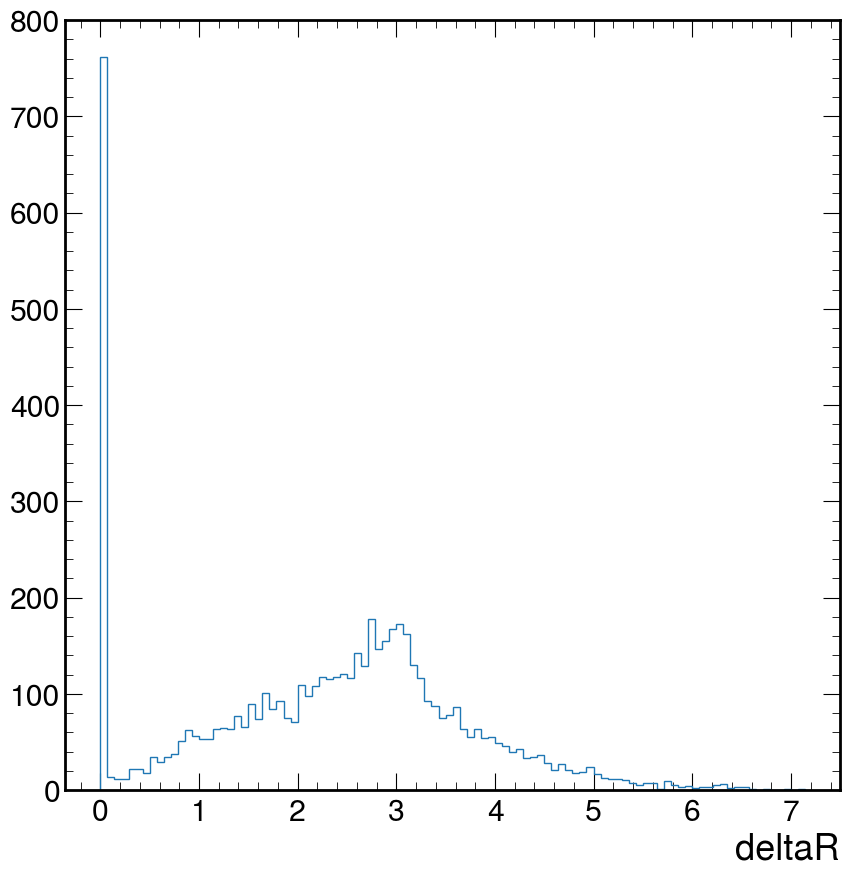

In [45]:
# plt.plot(truth_df.deltaR, '.')
plt.hist(truth_df_Kp.deltaR, bins=100, histtype='step')
plt.xlabel('deltaR')

In [46]:
# for each unique Event number, only keep the row with lowest value of the deltaR
truth_df_Kp = truth_df_Kp.sort_values('deltaR').drop_duplicates('Event', keep='first')
truth_df_Km = truth_df_Km.sort_values('deltaR').drop_duplicates('Event', keep='first')

Text(1, 0, '$\\Delta R$')

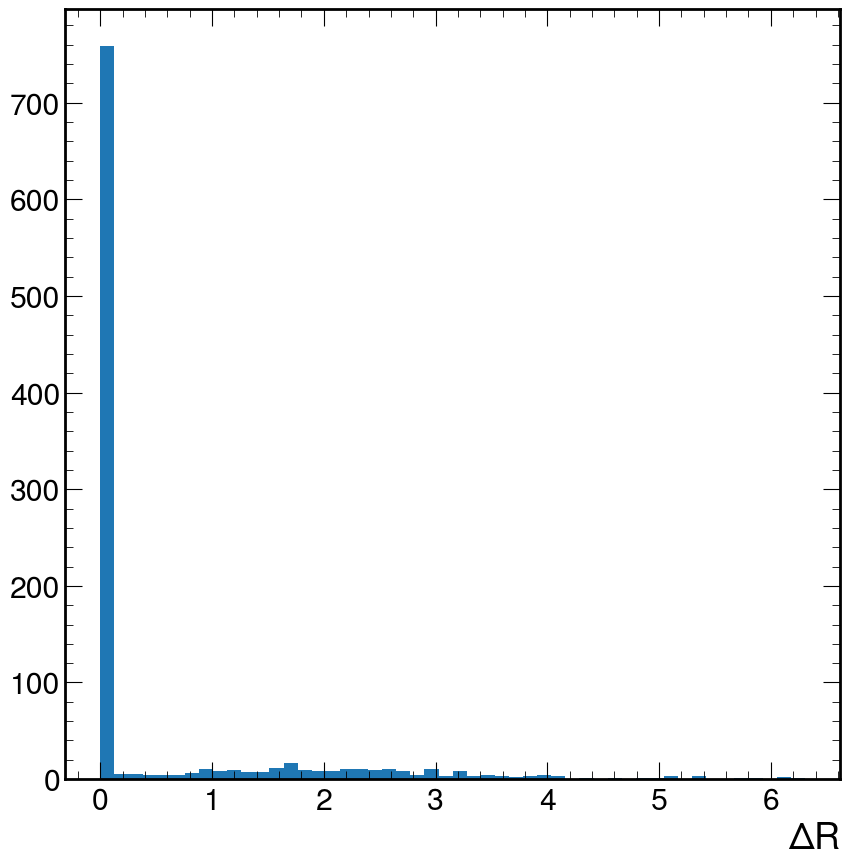

In [47]:
plt.hist(truth_df_Kp.deltaR, bins=50)
plt.xlabel(r'$\Delta R$')

Text(1, 0, '$\\Delta R$')

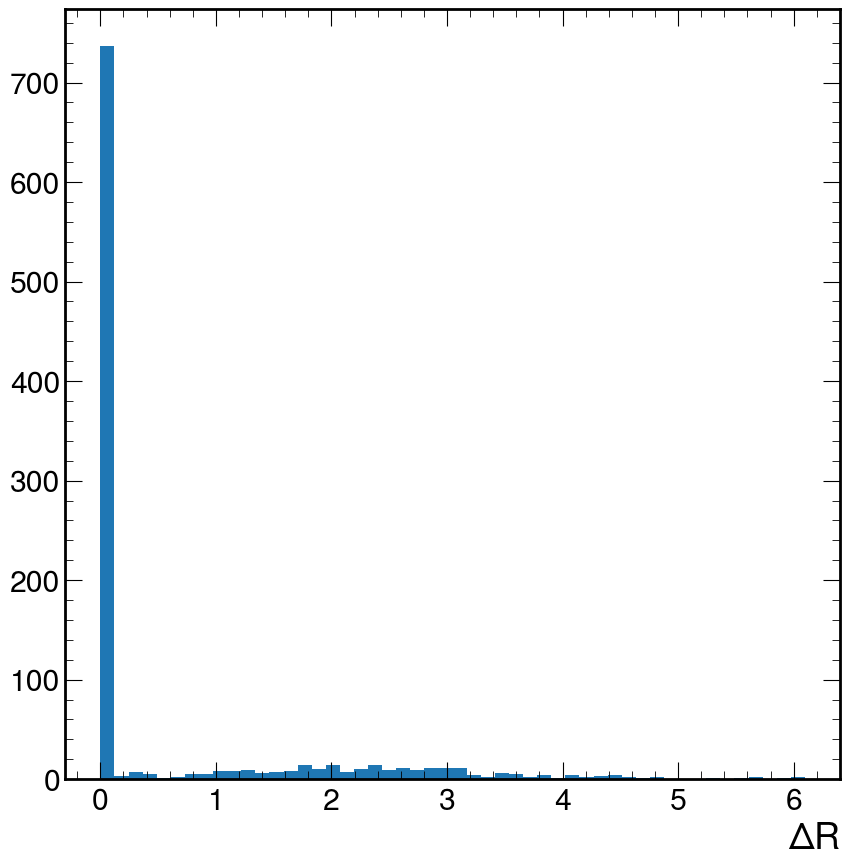

In [48]:
plt.hist(truth_df_Km.deltaR, bins=50)
plt.xlabel(r'$\Delta R$')

In [49]:
# drop rows with deltaR > 0.1
truth_df_Kp = truth_df_Kp[truth_df_Kp['deltaR'] <= 0.15]
truth_df_Km = truth_df_Km[truth_df_Km['deltaR'] <= 0.15]

Text(1, 0, '$\\Delta R$')

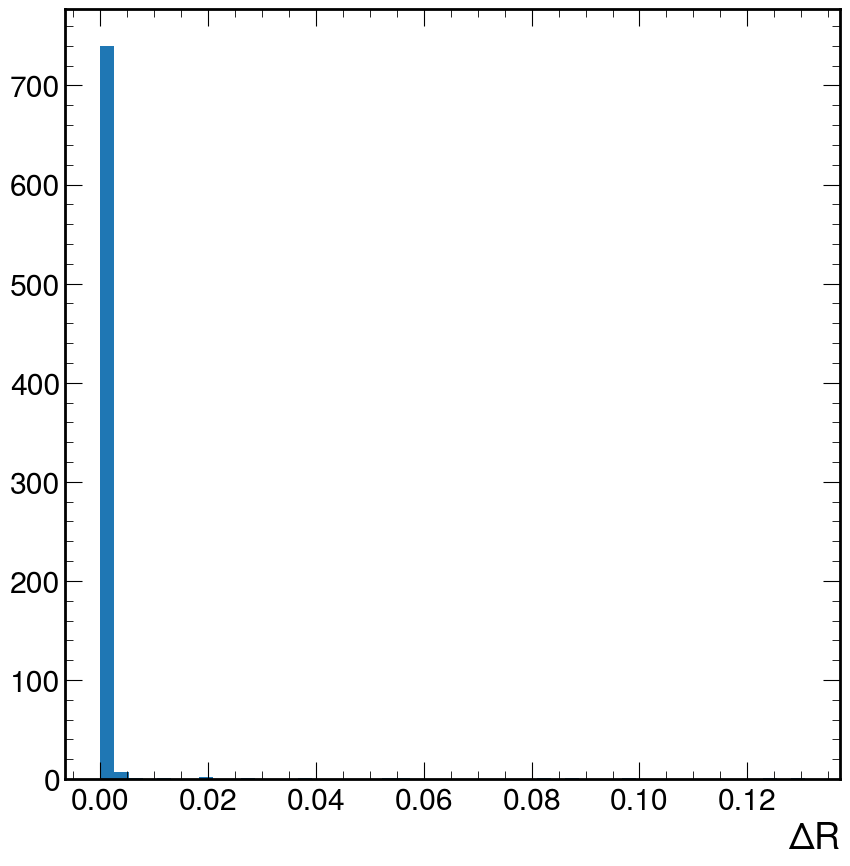

In [50]:
plt.hist(truth_df_Kp.deltaR, bins=50)
plt.xlabel(r'$\Delta R$')

In [51]:
# merge two datafreame on common "Event" column
phi_df = truth_df_Kp.merge(truth_df_Km, on='Event', how='inner', suffixes=('_Kp', '_Km'))

In [57]:
# TLorentzVectors for K_p and K_m
K_p = ROOT.TLorentzVector()
K_m = ROOT.TLorentzVector()

Phi = ROOT.TLorentzVector()

mass_Kp = 0.493677 # GeV
mass_Km = 0.493677 # GeV

K_p.SetXYZM(phi_df['pfCands_px_Kp'][0], phi_df['pfCands_py_Kp'][0], phi_df['pfCands_pz_Kp'][0], mass_Kp)
K_m.SetXYZM(phi_df['pfCands_px_Km'][0], phi_df['pfCands_py_Km'][0], phi_df['pfCands_pz_Km'][0], mass_Km)

In [66]:
def add_LorentzVector(row):
    mass_Kp = 0.493677 # GeV
    mass_Km = 0.493677 # GeV

    K_p = ROOT.TLorentzVector()
    K_m = ROOT.TLorentzVector()

    Phi = ROOT.TLorentzVector()

    K_p.SetXYZM(row['pfCands_px_Kp'], row['pfCands_py_Kp'], row['pfCands_pz_Kp'], mass_Kp)
    K_m.SetXYZM(row['pfCands_px_Km'], row['pfCands_py_Km'], row['pfCands_pz_Km'], mass_Km)

    Phi = K_p + K_m

    return Phi

In [68]:
# store TLorentzVector objects as a column in the dataframe
phi_df['Phi_candidates'] = phi_df.apply(lambda row: add_LorentzVector(row), axis=1)


In [71]:
phi_df.Phi_candidates.apply(lambda x: x.Py())

0     -22.928617
1     -25.690430
2       7.242517
3     -13.497853
4      22.369383
         ...    
696   -10.972415
697   -11.117065
698    -8.094060
699    -2.440772
700    16.932674
Name: Phi_candidates, Length: 701, dtype: float64

In [86]:
len(phi_df.Phi_candidates.apply(lambda x: x.M())[(phi_df.Phi_candidates.apply(lambda x: x.M()) > 0.92) & (phi_df.Phi_candidates.apply(lambda x: x.M()) < 1.12)])

681

Text(1, 0, 'Phi inv. mass [GeV]')

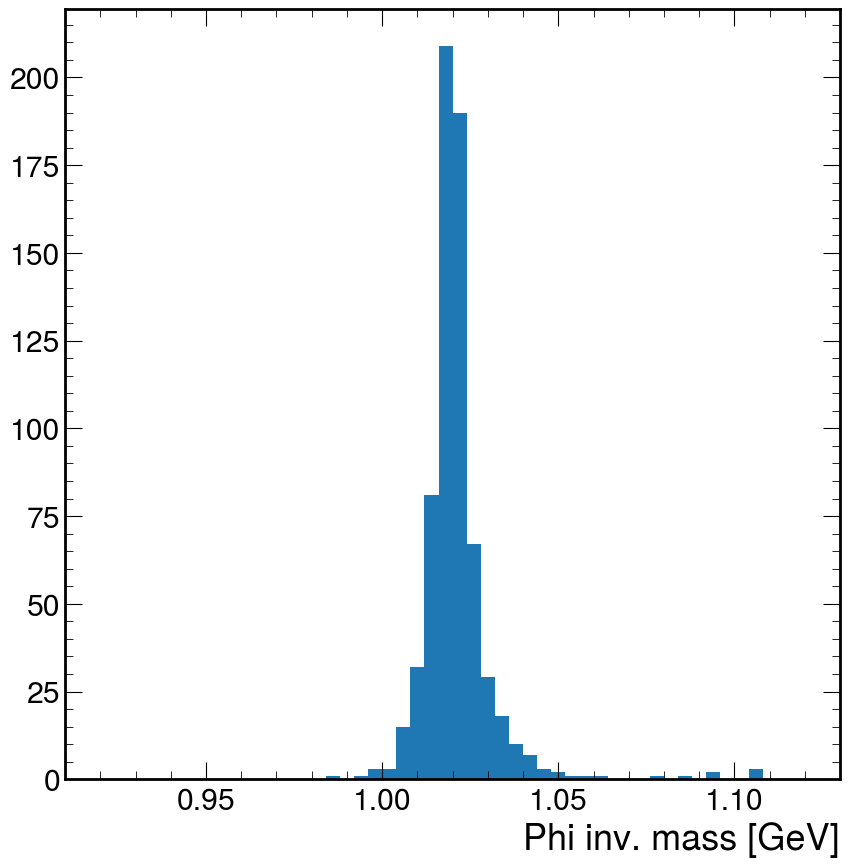

In [87]:
plt.hist( phi_df.Phi_candidates.apply(lambda x: x.M()), bins=50, range=(0.92, 1.12))
plt.xlabel('Phi inv. mass [GeV]')